In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
rej = pd.read_csv('../LC/Lending_Club_Rejected_2014_2018.csv')
rej['issue_d'] = pd.to_datetime(rej['Application_Date'], format="%Y-%m-%d")
rej.head()

,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt_to_Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code,issue_d
0,1000.0,2016-04-01,other,NaN,2.69%,331xx,FL,< 1 year,0.0,2016-04-01
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834xx,ID,< 1 year,0.0,2016-04-01
2,5000.0,2016-04-01,moving,NaN,-1%,648xx,MO,NaN,0.0,2016-04-01
3,1000.0,2016-04-01,moving,628.0,21.43%,380xx,TN,< 1 year,0.0,2016-04-01
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895xx,NV,2 years,2.0,2016-04-01


In [151]:
lc = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')
lc['issue_d'] = pd.to_datetime(lc['issue_d'], format="%b-%Y")

ts = pd.DataFrame()
ts['date'] = lc['issue_d'].unique()
ts['total_funded'] = ts['date'].apply(lambda x: sum(lc['funded_amnt'][lc['issue_d'] == x]))
ts['payback_success_rate'] = ts['date'].apply(lambda x: len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Fully Paid')])
                                           / (len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Charged Off')]) + 
                                              len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Fully Paid')]))
                                             )
ts['payback_failure_rate'] = ts['date'].apply(lambda x: len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Charged Off')])
                                           / (len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Charged Off')]) + 
                                              len(lc[(lc['issue_d'] == x) & (lc['loan_status'] == 'Fully Paid')]))
                                             )
ts['approval_rate'] = ts['date'].apply(lambda x: len(lc[lc['issue_d'] == x]) 
                                      / (len(lc[lc['issue_d'] == x]) + len(rej[rej['issue_d'] == x])))

ts.head()

/Users/agnimagarwal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,total_funded,payback_success_rate,payback_failure_rate,approval_rate
0,2015-12-01,667910550.0,0.791395,0.208605,0.755314
1,2015-11-01,567247325.0,0.801264,0.198736,0.871615
2,2015-10-01,738221400.0,0.809519,0.190481,0.818552
3,2015-09-01,450246800.0,0.794036,0.205964,0.774982
4,2015-08-01,555331400.0,0.800038,0.199962,0.896545


<AxesSubplot:xlabel='date'>

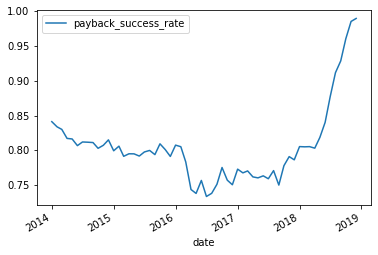

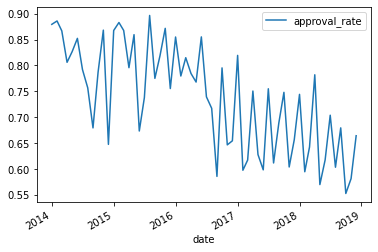

In [152]:
ts.plot('date', 'payback_success_rate')
ts.plot('date', 'approval_rate')

<AxesSubplot:xlabel='date'>

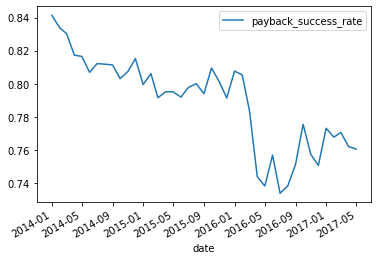

In [153]:
ts3 = ts[ts['date'] < pd.to_datetime('06-2017', format='%m-%Y')]
ts3.plot('date', 'payback_success_rate')

In [154]:
ec = pd.read_csv('Macroeconomic Data.csv')
ec['date'] = pd.to_datetime(ec['Month-Year'], format="%m-%Y")
del ec['Month-Year']
ec.head()

,CPI,FFR,UR,IR,MR,date
0,233.916,0.07,6.6,1.6,4.53,2014-01-01
1,234.781,0.07,6.7,1.1,4.23,2014-02-01
2,236.293,0.06,6.7,1.5,4.28,2014-03-01
3,237.072,0.08,6.2,2.0,4.41,2014-04-01
4,237.900,0.09,6.3,2.1,4.29,2014-05-01


In [368]:
df = pd.concat([ts.set_index('date'), ec.set_index('date')], axis=1, join='inner')
df.head()

,total_funded,payback_success_rate,payback_failure_rate,approval_rate,CPI,FFR,UR,IR,MR
date,,,,,,,,,
2015-12-01,667910550.0,0.791395,0.208605,0.755314,236.525,0.13,5.0,0.7,3.93
2015-11-01,567247325.0,0.801264,0.198736,0.871615,237.336,0.07,5.1,0.5,3.87
2015-10-01,738221400.0,0.809519,0.190481,0.818552,237.838,0.13,5.0,0.2,3.85
2015-09-01,450246800.0,0.794036,0.205964,0.774982,237.945,0.14,5.0,0.0,3.89
2015-08-01,555331400.0,0.800038,0.199962,0.896545,238.316,0.08,5.1,0.2,3.91


In [369]:
out = ['total_funded', 'payback_success_rate', 'approval_rate']
ec_fts = ['CPI', 'FFR', 'UR', 'IR', 'MR']

## Granger Causality test

In [357]:
# for payback_success_rate
df = pd.concat([ts3.set_index('date'), ec.set_index('date')], axis=1, join='inner')
df.sort_index().tail()

,total_funded,payback_success_rate,payback_failure_rate,approval_rate,CPI,FFR,UR,IR,MR
date,,,,,,,,,
2017-01-01,470400950.0,0.773149,0.226851,0.819370,242.839,0.55,4.7,2.5,4.20
2017-02-01,417331475.0,0.767820,0.232180,0.597452,243.603,0.66,4.6,2.7,4.19
2017-03-01,550237050.0,0.770592,0.229408,0.617051,243.801,0.66,4.4,2.4,4.10
2017-04-01,437930725.0,0.762039,0.237961,0.750499,244.524,0.82,4.4,2.2,4.10
2017-05-01,549518775.0,0.760634,0.239366,0.627786,244.733,0.91,4.4,1.9,4.02


In [370]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller

for col in out:
    print(col)
    result = adfuller(df[col])
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'critical_values: {result[4]}')
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")
    print()

total_funded
Test Statistics: -4.40916523263414
p-value: 0.0002859405372569307
critical_values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is stationary

payback_success_rate
Test Statistics: -3.678981435108204
p-value: 0.004418702630424878
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is stationary

approval_rate
Test Statistics: -4.9875649170672585
p-value: 2.3485749721555528e-05
critical_values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is stationary



In [371]:
for col in ec_fts:
    print(col)
    result = adfuller(df[col])
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'critical_values: {result[4]}')
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")
    print()

CPI
Test Statistics: -2.973375651616427
p-value: 0.03745670035158815
critical_values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is stationary

FFR
Test Statistics: -3.4153114920109977
p-value: 0.010447847521342079
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is stationary

UR
Test Statistics: -2.5404816697546564
p-value: 0.10593274168765482
critical_values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is not stationary

IR
Test Statistics: -2.8506318299852342
p-value: 0.051397405527144766
critical_values: {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}
Series is not stationary

MR
Test Statistics: -2.8121112445541603
p-value: 0.05656448036110452
critical_values: {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}
Series is not stationary



In [372]:
# To create stationarity for UR, IR, MR, conduct first-order differencing and repeat test
df_transformed = df.diff().dropna()
for col in ec_fts:
    print(col)
    result = adfuller(df_transformed[col])
    print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'critical_values: {result[4]}')
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")
    print()

CPI
Test Statistics: -7.506683173009954
p-value: 4.116998096480892e-11
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is stationary

FFR
Test Statistics: -4.818698107737975
p-value: 5.00793283240796e-05
critical_values: {'1%': -3.560242358792829, '5%': -2.9178502070837, '10%': -2.5967964150943397}
Series is stationary

UR
Test Statistics: -7.759165613796082
p-value: 9.55686464088385e-12
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is stationary

IR
Test Statistics: -7.62453833318844
p-value: 2.0855268764846997e-11
critical_values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Series is stationary

MR
Test Statistics: -6.436965748489632
p-value: 1.6437061992245245e-08
critical_values: {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
Series is stationary



In [373]:
from statsmodels.tsa.stattools import grangercausalitytests

for col in ec_fts:
    print(col)
    grangercausalitytests(df[['total_funded', col]], maxlag=[3])
    print('\n\n')

CPI

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8864  , p=0.0447  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=9.8716  , p=0.0197  , df=3
likelihood ratio test: chi2=9.1042  , p=0.0279  , df=3
parameter F test:         F=2.8864  , p=0.0447  , df_denom=50, df_num=3



FFR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8971  , p=0.0140  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=13.3282 , p=0.0040  , df=3
likelihood ratio test: chi2=11.9769 , p=0.0075  , df=3
parameter F test:         F=3.8971  , p=0.0140  , df_denom=50, df_num=3



UR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4196  , p=0.0026  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=18.5350 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0481 , p=0.0011  , df=3
parameter F test:         F=5.4196  , p=0.0026  , df_denom=50, df_num=3



IR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6

In [374]:
# reverse direction
for col in ec_fts:
    print(col)
    grangercausalitytests(df[[col, 'total_funded']], maxlag=[3])
    print('\n\n')

CPI

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2812  , p=0.2910  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=4.3816  , p=0.2231  , df=3
likelihood ratio test: chi2=4.2214  , p=0.2385  , df=3
parameter F test:         F=1.2812  , p=0.2910  , df_denom=50, df_num=3



FFR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3065  , p=0.2827  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=4.4682  , p=0.2151  , df=3
likelihood ratio test: chi2=4.3017  , p=0.2307  , df=3
parameter F test:         F=1.3065  , p=0.2827  , df_denom=50, df_num=3



UR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4206  , p=0.2477  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=4.8586  , p=0.1825  , df=3
likelihood ratio test: chi2=4.6626  , p=0.1982  , df=3
parameter F test:         F=1.4206  , p=0.2477  , df_denom=50, df_num=3



IR

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1

In [362]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
df_norm = normalize(df)

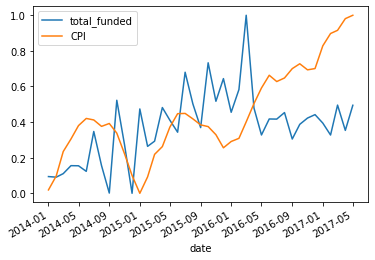

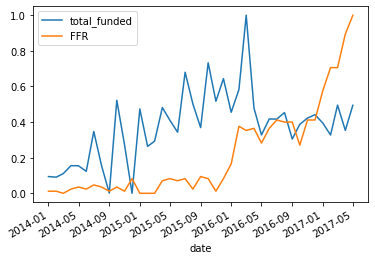

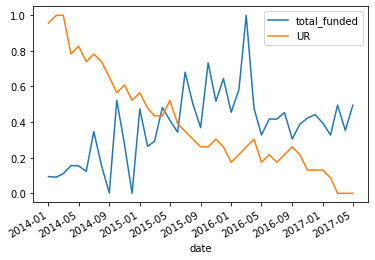

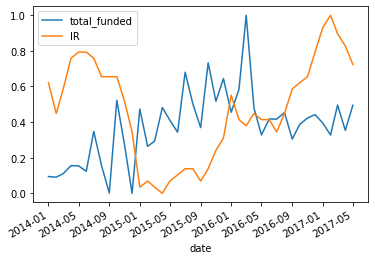

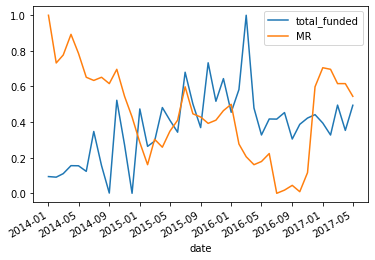

In [363]:
for col in ec_fts:
    df_norm.plot(y=['total_funded', col])

## Regressions

### ts forecasting total_funded

In [351]:
df_norm = df_norm.sort_index()
X = df_norm[ec_fts]
y = df_norm['total_funded']

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=False)

In [353]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [354]:
y_pred = LR.predict(X_test)
y_pred

array([0.59700576, 0.57021756, 0.58522117, 0.58450056, 0.6078724 ,
       0.54989463, 0.61114455, 0.62821778, 0.67177897, 0.66192018,
       0.70263658, 0.7050068 ])

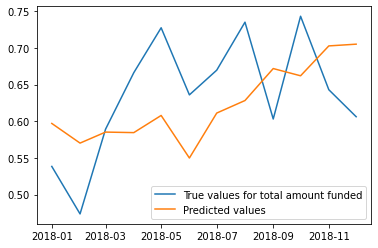

MSE = 0.0819


In [355]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.legend(['True values for total amount funded', 'Predicted values'])
plt.show()
print('MSE = ' + str(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)))

[(-0.244, 'CPI'), (0.1772, 'FFR'), (-0.6802, 'UR'), (-0.2138, 'IR'), (0.0899, 'MR')]


/var/folders/13/9ylnh3d93p713zhkf6kdgzyr0000gn/T/ipykernel_98665/4132714739.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


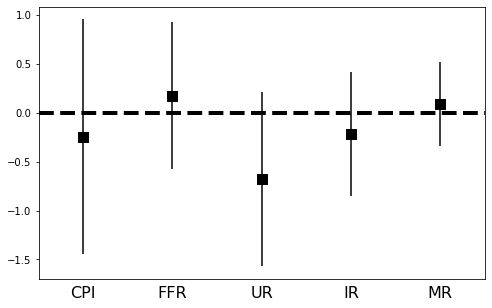

In [356]:
print(list(zip([round(x, 4) for x in LR.coef_], ec_fts)))

coef_df = pd.DataFrame()
coef_df['coef'] = LR.coef_
coef_df['varname'] = ec_fts

N = len(X_test)
p = len(X_test.columns) + 1
residuals = y_test - y_pred
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (N - p)
var_beta_hat = np.linalg.inv(X_test.T @ X_test) * sigma_squared_hat
se = []
for p_ in range(p - 1):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    se.append(standard_error)

coef_df['err'] = se


fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(ec_fts, 
                       rotation=0, fontsize=16)

### ts forecasting payback_failure_rate

In [364]:
df_norm = df_norm.sort_index()
X = df_norm[ec_fts]
y = df_norm['payback_failure_rate']

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=False)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

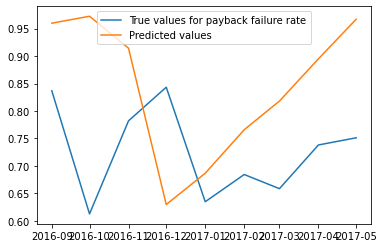

MSE = 0.1868


In [366]:
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.legend(['True values for payback failure rate', 'Predicted values'])
plt.show()
print('MSE = ' + str(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)))


[(0.6282, 'CPI'), (0.2111, 'FFR'), (0.0288, 'UR'), (0.0593, 'IR'), (-0.6168, 'MR')]


/var/folders/13/9ylnh3d93p713zhkf6kdgzyr0000gn/T/ipykernel_98665/4132714739.py:27: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


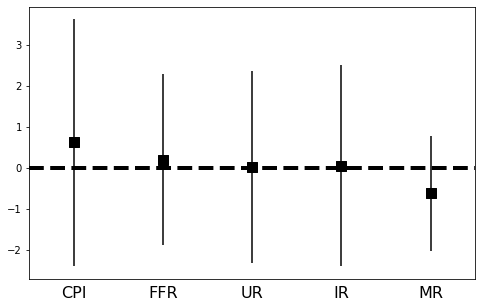

In [367]:
print(list(zip([round(x, 4) for x in LR.coef_], ec_fts)))

coef_df = pd.DataFrame()
coef_df['coef'] = LR.coef_
coef_df['varname'] = ec_fts

N = len(X_test)
p = len(X_test.columns) + 1
residuals = y_test - y_pred
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares / (N - p)
var_beta_hat = np.linalg.inv(X_test.T @ X_test) * sigma_squared_hat
se = []
for p_ in range(p - 1):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    se.append(standard_error)

coef_df['err'] = se


fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(ec_fts, 
                       rotation=0, fontsize=16)